In [51]:
import matplotlib.pyplot as plt
import numpy as np

In [52]:
blinkplus_broad_path = "../blinkplus_examples/logs/blinkplus_broadcast.log"
nccl_broad_path = "../blinkplus_examples/logs/nccl_broadcast.log"
int_size = 4
font_size = 20

In [53]:
def get_data_time(path):
    data_points = []
    bw_points = []
    time_points = []
    with open(path, 'r') as f:
        lines = f.readlines()
        for l in lines:
            if "Initial" in l:
                #print(l.split(" "))
                data_points.append(int(l.split(" ")[-2]))
            if "Average" in l:
                time_points.append(float(l[:-1].split(" ")[-5])) 
                bw_points.append(float(l[:-1].split(" ")[-2])) 
    return np.array(data_points), np.array(time_points), np.array(bw_points)

[14.23406 16.29585 17.49808 18.16552 18.5835  19.10624 21.69281 22.86008
 22.88584 22.89745 22.90647]


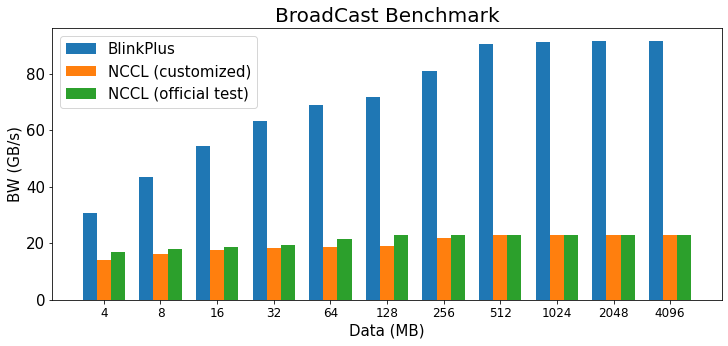

In [118]:
nccl_test_bw_scan_points = [20.47, 21.59, 22.24, 22.57, 22.74, 22.83, 22.87, 22.89, 22.9, 22.91, 22.91]
nccl_test_bw_sample_points = [17.04, 18.02, 18.64, 19.22, 21.37, 22.82, 22.87, 22.89, 22.90, 22.91, 22.90]
# 17.03   18.01  18.64    19.01
# 17.03   18.02  19.02    19.37
# 17.05   18.02  19.00 
# 17.01   18.02  19.02

data_points, time_points, bw_points = get_data_time(blinkplus_broad_path)
nccl_data_points, nccl_time_points, nccl_bw_points = get_data_time(nccl_broad_path)
print(nccl_bw_points)
X_axis = np.arange(len(data_points))

fig = plt.figure(figsize = (12, 5))
 
data_points_ticks = [str(item) for item in data_points]
plt.bar(X_axis- 0.25, bw_points, width = 0.25, label='BlinkPlus')
plt.bar(X_axis, nccl_bw_points, width = 0.25, label='NCCL (customized)')
plt.bar(X_axis+ 0.25, nccl_test_bw_sample_points, width = 0.25, label='NCCL (official test)')
plt.xticks(X_axis, data_points_ticks)


plt.xlabel("Data (MB)", fontsize=font_size-5)
plt.ylabel("BW (GB/s)", fontsize=font_size-5)
plt.legend(fontsize=font_size-5)
plt.xticks(fontsize=font_size-8)
plt.yticks(fontsize=font_size-5)
plt.title("BroadCast Benchmark", fontsize=font_size)
plt.show()


# Allreduce Benchmark


In [119]:
nccl_test_allreduce_bw_sample_points = [14.57, 15.80, 16.27, 16.54, 18.77, 21.76, 21.68, 22.48, 22.49, 22.49, 22.50]
nccl_test_allreduce_bw_scan_points = [20.31, 21.39, 21.87, 22.17, 22.33, 22.42, 22.45, 22.48, 22.49, 22.5, 22.5]
blinkplus_allreduce_path = "../blinkplus_examples/logs/blinkplus_allreduce.log"
nccl_allreduce_path = "../blinkplus_examples/logs/nccl_allreduce.log"

[13.88779 15.50404 16.14227 16.48162 16.80296 17.245   19.96971 22.27687
 22.48438 22.49281 22.49859]


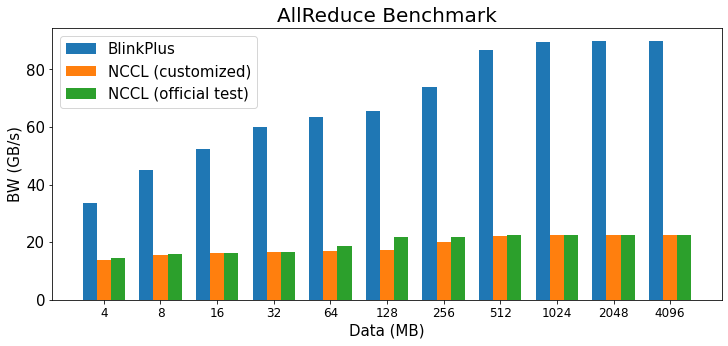

In [120]:


data_points, time_points, bw_points = get_data_time(blinkplus_allreduce_path)
nccl_data_points, nccl_time_points, nccl_bw_points = get_data_time(nccl_allreduce_path)
print(nccl_bw_points)
X_axis = np.arange(len(data_points))

fig = plt.figure(figsize = (12, 5))
 
data_points_ticks = [str(item) for item in data_points]
plt.bar(X_axis- 0.25, bw_points, width = 0.25, label='BlinkPlus')
plt.bar(X_axis, nccl_bw_points, width = 0.25, label='NCCL (customized)')
plt.bar(X_axis+ 0.25, nccl_test_allreduce_bw_sample_points, width = 0.25, label='NCCL (official test)')
plt.xticks(X_axis, data_points_ticks)


plt.xlabel("Data (MB)", fontsize=font_size-5)
plt.ylabel("BW (GB/s)", fontsize=font_size-5)
plt.legend(fontsize=font_size-5)
plt.xticks(fontsize=font_size-8)
plt.yticks(fontsize=font_size-5)
plt.title("AllReduce Benchmark", fontsize=font_size)
plt.show()
